<h1>Projet-3 : Concevez une application au service de la santé publique<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Projet-3-:-Concevez-une-application-au-service-de-la-santé-publique" data-toc-modified-id="Projet-3-:-Concevez-une-application-au-service-de-la-santé-publique-1">Projet-3 : Concevez une application au service de la santé publique</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1">Introduction</a></span></li><li><span><a href="#Environnement" data-toc-modified-id="Environnement-1.2">Environnement</a></span></li></ul></li><li><span><a href="#1.-Chargement-des-données" data-toc-modified-id="1.-Chargement-des-données-2">1. Chargement des données</a></span></li><li><span><a href="#2.-Nettoyage-du-jeu-de-données" data-toc-modified-id="2.-Nettoyage-du-jeu-de-données-3">2. Nettoyage du jeu de données</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#2.1-Nettoyage-des-types" data-toc-modified-id="2.1-Nettoyage-des-types-3.0.1">2.1 Nettoyage des types</a></span></li><li><span><a href="#2.2-Les-NaN" data-toc-modified-id="2.2-Les-NaN-3.0.2">2.2 Les NaN</a></span><ul class="toc-item"><li><span><a href="#On-supprime-les-colonnes-qui-ne-sont-jamais-utilisées" data-toc-modified-id="On-supprime-les-colonnes-qui-ne-sont-jamais-utilisées-3.0.2.1">On supprime les colonnes qui ne sont jamais utilisées</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#3.1-On-explore-les-GENERAL-INFORMATION" data-toc-modified-id="3.1-On-explore-les-GENERAL-INFORMATION-4">3.1 On explore les GENERAL INFORMATION</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Recherche-des-doublons-(colonnes)" data-toc-modified-id="Recherche-des-doublons-(colonnes)-4.0.0.1">Recherche des doublons (colonnes)</a></span></li><li><span><a href="#Recherche-des-doublons-(lignes)" data-toc-modified-id="Recherche-des-doublons-(lignes)-4.0.0.2">Recherche des doublons (lignes)</a></span></li></ul></li><li><span><a href="#3.1.1-Créateurs" data-toc-modified-id="3.1.1-Créateurs-4.0.1">3.1.1 Créateurs</a></span></li><li><span><a href="#3.1.1-Les-dates" data-toc-modified-id="3.1.1-Les-dates-4.0.2">3.1.1 Les dates</a></span></li><li><span><a href="#3.1.3-Les-produits" data-toc-modified-id="3.1.3-Les-produits-4.0.3">3.1.3 Les produits</a></span></li></ul></li></ul></li><li><span><a href="#3.2-On-explore-les-TAGS" data-toc-modified-id="3.2-On-explore-les-TAGS-5">3.2 On explore les TAGS</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#3.2.1-Les-categories" data-toc-modified-id="3.2.1-Les-categories-5.0.1">3.2.1 Les categories</a></span></li><li><span><a href="#3.2.2-Produits-et-Marques" data-toc-modified-id="3.2.2-Produits-et-Marques-5.0.2">3.2.2 Produits et Marques</a></span></li><li><span><a href="#3.2.3-Les-Pays" data-toc-modified-id="3.2.3-Les-Pays-5.0.3">3.2.3 Les Pays</a></span><ul class="toc-item"><li><span><a href="#le-nombre-de-pays-représentés" data-toc-modified-id="le-nombre-de-pays-représentés-5.0.3.1">le nombre de pays représentés</a></span></li><li><span><a href="#Bilan" data-toc-modified-id="Bilan-5.0.3.2">Bilan</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#On-explore-les-INGREDIENTS" data-toc-modified-id="On-explore-les-INGREDIENTS-6">On explore les INGREDIENTS</a></span></li><li><span><a href="#On-explore-les-NUTRITION-FACTS" data-toc-modified-id="On-explore-les-NUTRITION-FACTS-7">On explore les NUTRITION FACTS</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Idée-d'application" data-toc-modified-id="Idée-d'application-7.0.0.1">Idée d'application</a></span></li></ul></li></ul></li><li><span><a href="#3.1-Selection-des-colonnes-information-non-numériques-utiles-pour-notre-application" data-toc-modified-id="3.1-Selection-des-colonnes-information-non-numériques-utiles-pour-notre-application-7.1">3.1 Selection des colonnes information non numériques utiles pour notre application</a></span></li></ul></li></ul></div>

<a name='sommaire'>
    <img src="assets/img/combo_logo.jpg" />
</a>

# Projet-3 : Concevez une application au service de la santé publique
## Introduction 
***
- **Source des données** : Open Food Facts répertorie les informations sur les produits alimentaires : ingrédients, informations nutritionnelles, labels etc.
    - Les données proviennent majoritairement de la collecte citoyenne (crowdsourcing) des informations.
***
- **Utilisation de la base** : 
    - Traiter le jeu de données afin de repérer des variables pertinentes pour les traitements à venir. Automatiser ces traitements pour éviter de répéter ces opérations.
    - **Idée de l'application** : aide à l'identification des produits à surveiller dans le cas de régime alimentaire liées à la surveillance en utilisant la base d'OpenFood Facts
***
## Environnement

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import sys
import warnings
import IPython as ip
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import missingno as msno 
# Configuration pour travail avec fichier python "tools" de fonctions
%load_ext autoreload
%aimport tools

# Set option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Recharger les modules pour la conception des fichiers tools

%autoreload 1

warnings.filterwarnings("ignore")

# 1. Chargement des données

In [2]:
# Import données
data = pd.read_csv('assets/datas/openfoodfacts.csv', sep='\t', low_memory=False)

# 2. Nettoyage du jeu de données

In [3]:
# Afficher le nombre de lignes de colonnes et de doublon je de données initial
tools.get_info_data(data,doublon=True)

------------------------------------------------------------------
Taille du jeu de données 

Nombre de lignes : 320772 lignes
Nombre de colonnes : 162 colonnes
Nombre d'éléments dupliqués dans le dataframe : 0 eléments
------------------------------------------------------------------


In [4]:
# Afficher les 3 premières lignes du jeu de données 
data.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ bananas -> en:bananas ]

In [5]:
# Création d'un df de travail
df = data.copy()

### 2.1 Nettoyage des types

-------------------------------------------------------------
Type de variable pour chacune des variables



code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                


----------------------------------------------------------
Répartition des types de variable



,Nombre par type de variable,% des types de variable
float64,106,65.430000
object,56,34.570000


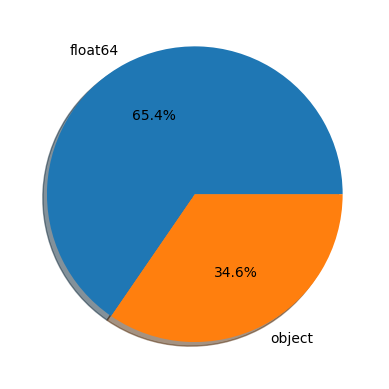

In [6]:
tools.get_types_variables(df,True,True,True)

**Erreurs de formattage** : 
- On convertie  'created_datetime','last_modified_datetime' en date

**Erreurs lexicales** : dans les colonnes 'created_datetime','last_modified_datetime 
- On supprime les erreurs en les remplaçant par NaN


In [7]:
# On supprime les erreurs
df.loc[df['created_datetime']=='Dia,Sogeres','created_datetime']='NaN'
df.loc[df['created_datetime']=='SuperU','created_datetime']='NaN'
df.loc[df['created_datetime']=='Carrefour','created_datetime']='NaN'
df.loc[df['created_datetime']=='Auchan','created_datetime']='NaN'
df.loc[df['created_datetime']=='Carrefour market','created_datetime']='NaN'
df.loc[df['created_datetime']=='SuperU,Leclerc','created_datetime']='NaN'
df.loc[df['created_datetime']=='Spar','created_datetime']='NaN'
df.loc[df['created_datetime']=='Banque alimentaire','created_datetime']='NaN'
df.loc[df['created_datetime']=='Leclerc','created_datetime']='NaN'
df.loc[df['created_datetime']=='Auchan,Super U','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U,Leclerc,Carrefour','created_datetime']='NaN'
df.loc[df['created_datetime']=='Cora','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U','created_datetime']='NaN'
df.loc[df['created_datetime']=='Super U,Leclerc,Carrefour','created_datetime']='NaN'

# On convertit la colonne created_datetime au format date
df["created_datetime"] =  pd.to_datetime(df["created_datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [8]:
# On supprime les erreurs
df.loc[df['created_t']=='France','created_t']='NaN'
df.loc[df['created_t']=='Villecresnes,Villeurbanne,France','created_t']='NaN'
df.loc[df['created_t']=='Veynes,France','created_t']='NaN'
df.loc[df['created_t']=='Saint-Priest,France','created_t']='NaN'
df.loc[df['created_t']=='Torcy 77,France','created_t']='NaN'
df.loc[df['created_t']=='Villers Bocage 80260,France','created_t']='NaN'
df.loc[df['created_t']=='Montgermont','created_t']='NaN'
df.loc[df['created_t']=='Marseille 5°,France','created_t']='NaN'
df.loc[df['created_t']=='France,Nantes,Carquefou','created_t']='NaN'
df.loc[df['created_t']=='Courrières,France','created_t']='NaN'
df.loc[df['created_t']=='Brétigny-sur-Orge,Marseille 5°','created_t']='NaN'
df.loc[df['created_t']=='Brétigny-sur-Orge,Marseille 5°,France','created_t']='NaN'
df.loc[df['created_t']=='France','created_t']='NaN'

# On convertit la colonne created_t au format date
df['created_t'] = pd.to_datetime(df['created_t'],unit='s')

In [9]:
# On supprime les erreurs
df.loc[df['last_modified_t']=='Belgique,France','last_modified_t']='NaN'
df.loc[df['last_modified_t']=='France','last_modified_t']='NaN'
df.loc[df['last_modified_t']=='Belgique,France, en:switzerland','last_modified_t']='NaN'
df.loc[df['last_modified_t']=='Suisse,France','last_modified_t']='NaN'

# On convertit la colonne last_modified_t au format date
df['last_modified_t'] = pd.to_datetime(df['last_modified_t'],unit='s')

In [10]:
# On supprime les erreurs de saisie
# data.loc[data['montant']==-15000, 'montant'] = -14.39
df.loc[df['last_modified_datetime']=='en:belgium,en:france','last_modified_datetime']='NaN'
df.loc[df['last_modified_datetime']=='en:france','last_modified_datetime']='NaN'
df.loc[df['last_modified_datetime']=='en:belgium,en:france,en:switzerland','last_modified_datetime']='NaN'
df.loc[df['last_modified_datetime']=='en:france,en:switzerland','last_modified_datetime']='NaN'

# On convertit la colonne last_modified_dattetime au format date
df["last_modified_datetime"] =  pd.to_datetime(df["last_modified_datetime"], format="%Y-%m-%dT%H:%M:%SZ")

In [11]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 09:17:46,2016-09-17 09:17:46,2016-09-17 09:18:13,2016-09-17 09:18:13,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),N

-------------------------------------------------------------
Type de variable pour chacune des variables



code                                                  object
url                                                   object
creator                                               object
created_t                                     datetime64[ns]
created_datetime                              datetime64[ns]
last_modified_t                               datetime64[ns]
last_modified_datetime                        datetime64[ns]
product_name                                          object
generic_name                                          object
quantity                                              object
packaging                                             object
packaging_tags                                        object
brands                                                object
brands_tags                                           object
categories                                            object
categories_tags                                       object
categories_fr           


----------------------------------------------------------
Répartition des types de variable



,Nombre par type de variable,% des types de variable
float64,106,65.430000
object,52,32.100000
datetime64[ns],4,2.470000


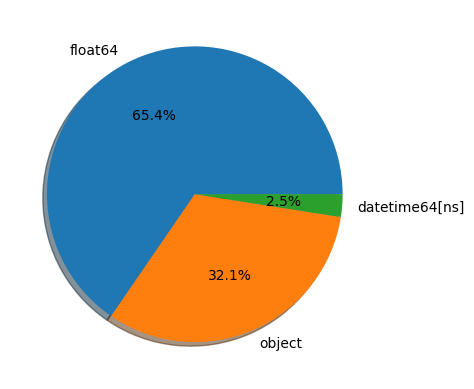

In [12]:
tools.get_types_variables(df,True,True,True)

In [13]:
# On crée des listes selon type
float_columns  = df.select_dtypes(include=['float64']).columns
object_columns = df.select_dtypes(include=['object']).columns
datetime_columns = df.select_dtypes(include=['datetime64[ns]']).columns


# On crée une fonction pour la suite
def get_infos_df(type) :
    '''mise à jours des valeurs float_columns et objects''' 
    float_columns  = df.select_dtypes(include=['float64']).columns
    object_columns = df.select_dtypes(include=['object']).columns
    
    print("--------------GENERAL----------------------------------")
    print(f"taille df : {df.shape}")
    print("")
    if type:
        print("--------------OBJECT----------------------------------")
        print(f"Nombre de colonne du type Object : {df[object_columns].shape[1]}")
        print("---------->")
        print(f"{object_columns.to_list()}")
        print("")
        print("--------------FLOAT-----------------------------------")
        print(f"Nombre de colonne du type Float : {df[float_columns].shape[1]}")
        print("---------->")
        print(f"{float_columns.to_list()}")
        print("")
        print("--------------datetime64[ns]-----------------------------------")
        print(f"Nombre de colonne du type Float : {df[datetime_columns].shape[1]}")
        print("---------->")
        print(f"{datetime_columns.to_list()}")
# On affiche les listes par type
get_infos_df(type=True)

--------------GENERAL----------------------------------
taille df : (320772, 162)

--------------OBJECT----------------------------------
Nombre de colonne du type Object : 52
---------->
['code', 'url', 'creator', 'product_name', 'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_fr', 'origins', 'origins_tags', 'manufacturing_places', 'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_fr', 'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities', 'cities_tags', 'purchase_places', 'stores', 'countries', 'countries_tags', 'countries_fr', 'ingredients_text', 'allergens', 'allergens_fr', 'traces', 'traces_tags', 'traces_fr', 'serving_size', 'additives', 'additives_tags', 'additives_fr', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_fr', 'main_category', 'main_category_f

### 2.2 Les NaN

Nombre total de données manquantes dans le dataframe : 39608670 données manquantes sur 51965064 (76.22%)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



,Nombres de valeurs manquantes,% de valeurs manquantes
water-hardness_100g,320772,100.000000
caproic-acid_100g,320772,100.000000
ingredients_from_palm_oil,320772,100.000000
ingredients_that_may_be_from_palm_oil,320772,100.000000
nutrition_grade_uk,320772,100.000000
maltodextrins_100g,320761,100.000000
maltose_100g,320768,100.000000
nervonic-acid_100g,320772,100.000000
erucic-acid_100g,320772,100.000000
mead-acid_100g,320772,100.000000


------------------------------------------------------------------
Visualisation des données manquantes


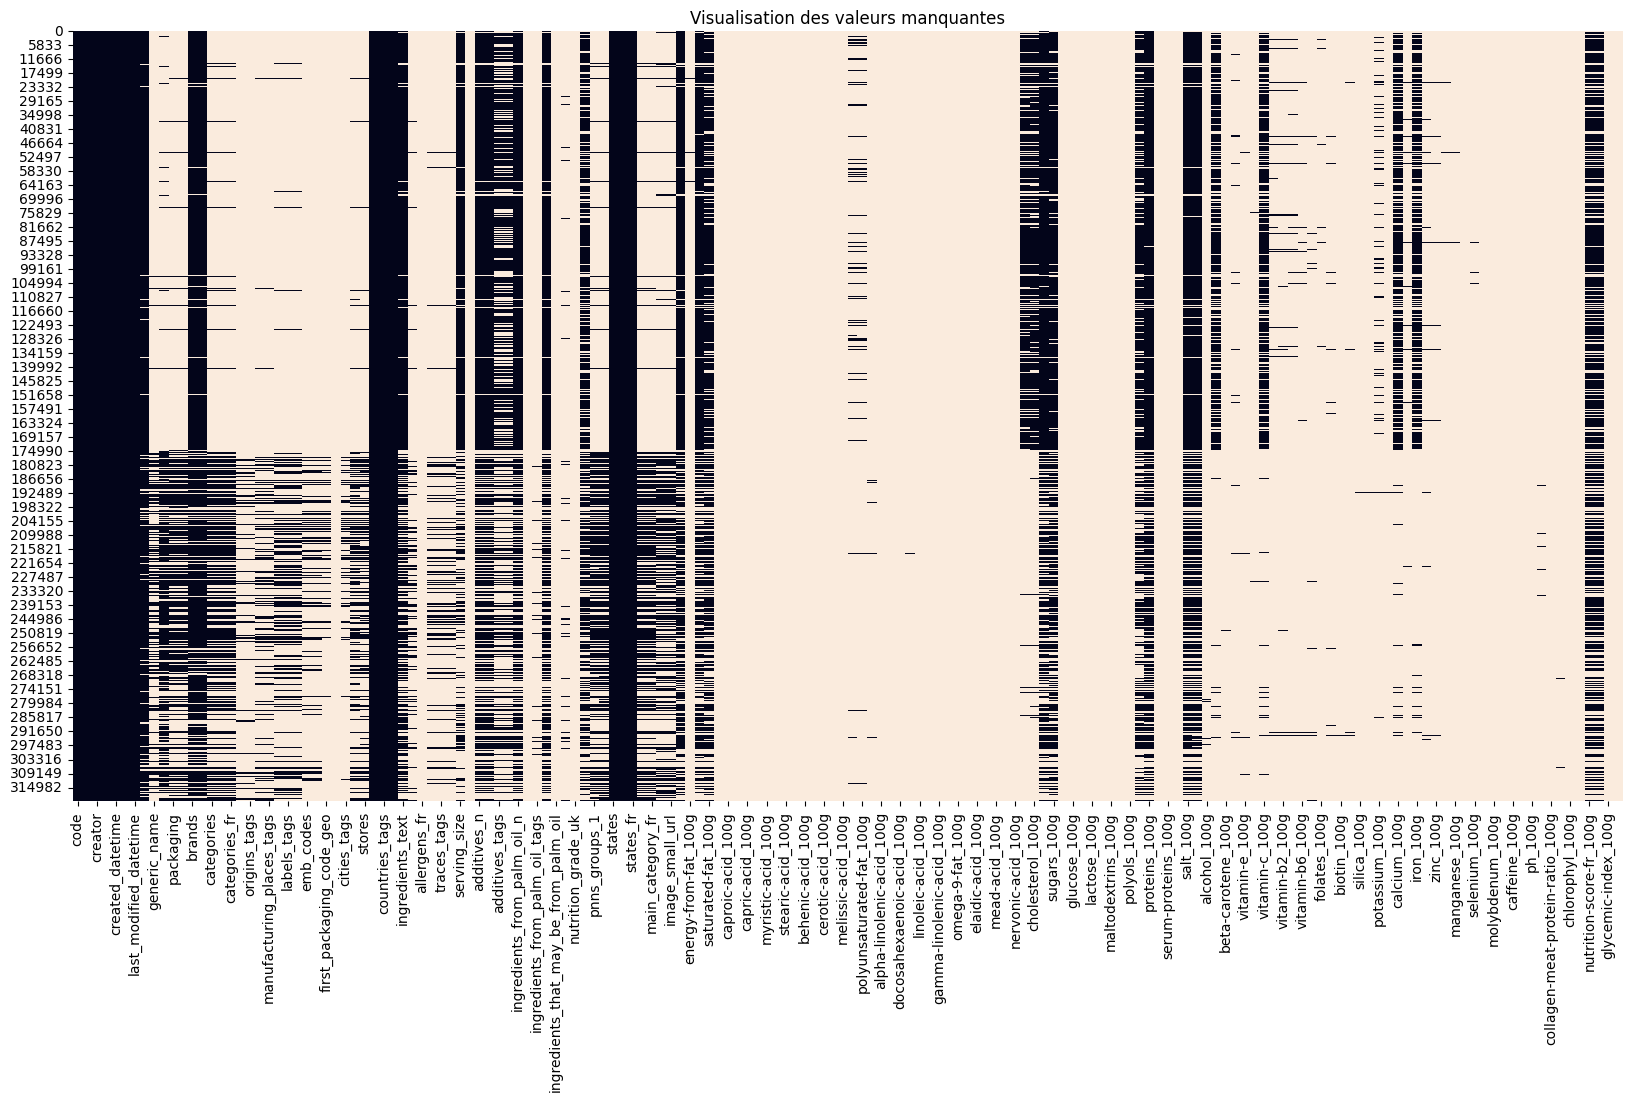

In [14]:
tools.get_missing_value(df,True,True)

#### On supprime les colonnes qui ne sont jamais utilisées

In [15]:
liste_colonne_jamais_utilisees =  tools.get_null_factor(df,100)
liste_colonne_jamais_utilisees

,Variables,Taux_de_Null
0,water-hardness_100g,100.0
1,no_nutriments,100.0
2,ingredients_that_may_be_from_palm_oil,100.0
3,nutrition_grade_uk,100.0
4,nervonic-acid_100g,100.0
5,erucic-acid_100g,100.0
6,mead-acid_100g,100.0
7,elaidic-acid_100g,100.0
8,butyric-acid_100g,100.0
9,caproic-acid_100g,100.0


- **Suppression de colonnes**

In [16]:
# On supprime les variables jamais utilisées
old_nb_col = df.shape[1]
elem = liste_colonne_jamais_utilisees['Variables']
df = df.drop(columns=liste_colonne_jamais_utilisees['Variables'],axis=1)
print(f"On a supprimé {old_nb_col - df.shape[1]} colonnes")

On a supprimé 16 colonnes


In [17]:
tools.get_missing_value(df,True,False)

Nombre total de données manquantes dans le dataframe : 34476318 données manquantes sur 46832712 (73.62%)
-------------------------------------------------------------
Nombre et pourcentage de valeurs manquantes par variable



,Nombres de valeurs manquantes,% de valeurs manquantes
nucleotides_100g,320763,100.000000
myristic-acid_100g,320771,100.000000
serum-proteins_100g,320756,100.000000
maltodextrins_100g,320761,100.000000
maltose_100g,320768,100.000000
caprylic-acid_100g,320771,100.000000
capric-acid_100g,320770,100.000000
molybdenum_100g,320761,100.000000
arachidonic-acid_100g,320764,100.000000
lauric-acid_100g,320768,100.000000


------------------------------------------------------------------


In [18]:
get_infos_df(type=False)

--------------GENERAL----------------------------------
taille df : (320772, 146)



# 3.1 On explore les GENERAL INFORMATION

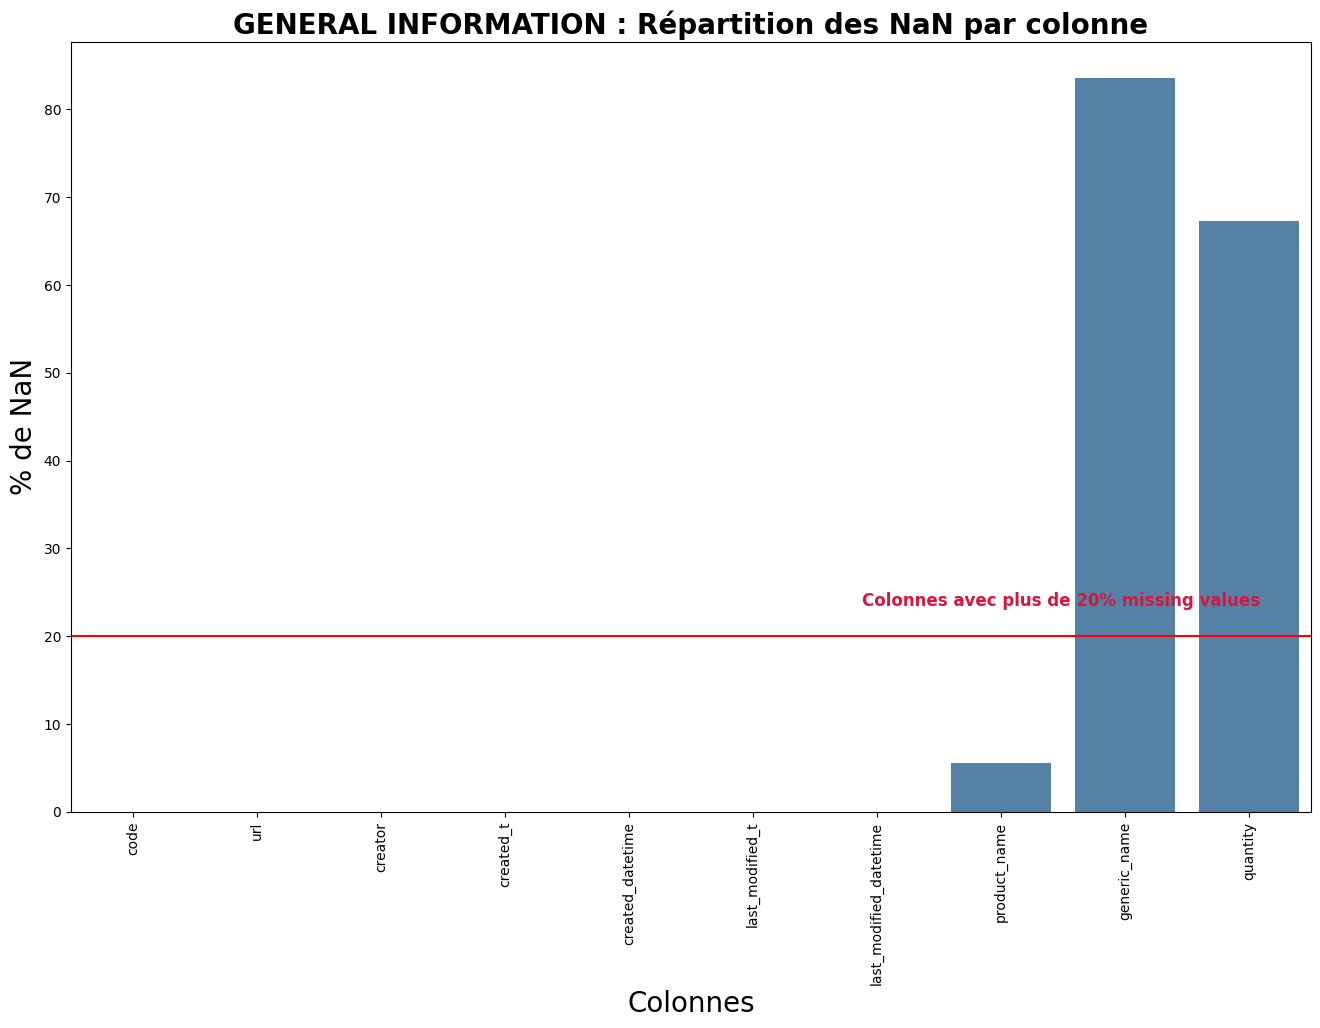

In [19]:
# On affiche la répartition des NaN 
# Les informations
tools.graph_NAN(data,20,0,10,"GENERAL INFORMATION : Répartition des NaN par colonne")

In [20]:
def info_list_colonnes(df,liste_col,_unique):
    '''
    Information sur les colonnes seeléctionnées
    paramètres : 
    - df
    - list_col : liste des colonne a considérer
    '''
    for i in liste_col:
        
        df_work = df[i]
        print("________")
        print(f"Colonne : {i}")
        print(f"Nombre de valeurs uniques : {df_work.nunique()}")
        print(f"Type de la variable       : {df[i].dtypes}")
        print(f"NaN                       : {round(df_work.isnull().mean()*100,2)} %")
        if _unique:
            print(f"Valeurs unique            : {df[i].unique()}")
        print("")


In [21]:
# List des colonnes information general
liste_information_general = df.iloc[:,10:34].columns
info_list_colonnes(df,liste_information_general,True)

________
Colonne : packaging
Nombre de valeurs uniques : 14547
Type de la variable       : object
NaN                       : 75.38 %
Valeurs unique            : [nan 'plastique' 'Frais' ... 'Carton,Tetra Pak,brique'
 'Sachets,Emballage individuel' 'Tetra Pak,Brique,tetra pak']

________
Colonne : packaging_tags
Nombre de valeurs uniques : 12064
Type de la variable       : object
NaN                       : 75.38 %
Valeurs unique            : [nan 'plastique' 'frais' ... 'carton,tetra-pak,brique'
 'sachets,emballage-individuel' 'tetra-pak,brique,tetra-pak']

________
Colonne : brands
Nombre de valeurs uniques : 58784
Type de la variable       : object
NaN                       : 8.86 %
Valeurs unique            : ["Ferme t'y R'nao" nan 'Torn & Glasser' ... 'Roussette du Bugey'
 'Sans marque,D.Lambert' '乐吧']

________
Colonne : brands_tags
Nombre de valeurs uniques : 50253
Type de la variable       : object
NaN                       : 8.86 %
Valeurs unique            : ['ferme-t-y-r-nao

#### Recherche des doublons (colonnes)

In [22]:
datetime_columns

Index(['created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime'],
      dtype='object')

In [23]:
df['created_t'].equals(df['created_datetime'])

False

In [24]:
df['last_modified_t'].equals(df['last_modified_datetime'])

True

#### Recherche des doublons (lignes)

In [25]:
def search_doublons_col(df,col):
    """
    affiche la liste des doublons de df
    """
    liste_doublon = df[df.duplicated([col],keep=False)]
    print(f"Il y a : {liste_doublon.shape[0]} doublons dans les codes produits : Ils ont NaN en tant que code")
    liste_doublon

In [26]:
def supp_doublons_col(df,col):
    nb_ligne_avant = df.shape[0]
    df = df.dropna(subset=['code'])
    print(f"Réduction du nombre de lignes : on passe de {nb_ligne_avant} à {df.shape[0]} lignes on a supprimmé {nb_ligne_avant - df.shape[0]} lignes")

In [27]:
# On compte les doublons dans les codes qui doivent être unique
search_doublons_col(df,'code')

Il y a : 23 doublons dans les codes produits : Ils ont NaN en tant que code


- **Suppression colonnes**

In [28]:
supp_doublons_col(df,'code')

Réduction du nombre de lignes : on passe de 320772 à 320749 lignes on a supprimmé 23 lignes


### 3.1.1 Créateurs

In [29]:
creators = df.groupby(by='creator')['code'].nunique().sort_values(ascending=False)

In [30]:
def plot_contributor(n=5):
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

    explodes = np.zeros(n)
    explodes[0] = .1

    def pct_tot(pct):
        tot = round(pct*creators[:n].sum(),0)
        tot_pct = tot/creators.sum()
        return "{:.1f}%\n({:.0f})".format(tot_pct,(tot/100))

    plt.pie(creators[:n], labels=creators[:n].index, 
            startangle=45, 
            shadow=True,
            explode=explodes,
            autopct=lambda pct: pct_tot(pct),
            textprops=dict(color="black",size=12, weight="bold"))
    plt.title("Les {:d} meilleurs contributeurs".format(n), 
              fontweight='bold',fontsize=24)
    plt.show()

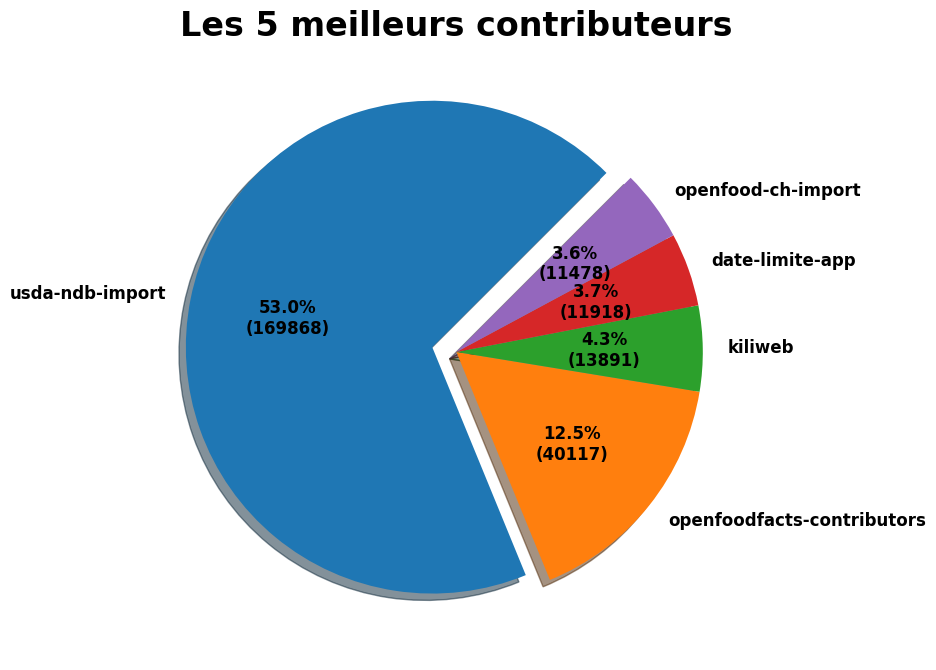

In [31]:
plot_contributor(n=5)

### 3.1.1 Les dates

In [32]:
# On visualise les variables date
df[datetime_columns].head()

,created_t,created_datetime,last_modified_t,last_modified_datetime
0,2016-09-17 09:17:46,2016-09-17 09:17:46,2016-09-17 09:18:13,2016-09-17 09:18:13
1,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37
2,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37,2017-03-09 14:32:37
3,2017-03-09 10:35:31,2017-03-09 10:35:31,2017-03-09 10:35:31,2017-03-09 10:35:31
4,2017-03-09 10:34:13,2017-03-09 10:34:13,2017-03-09 10:34:13,2017-03-09 10:34:13


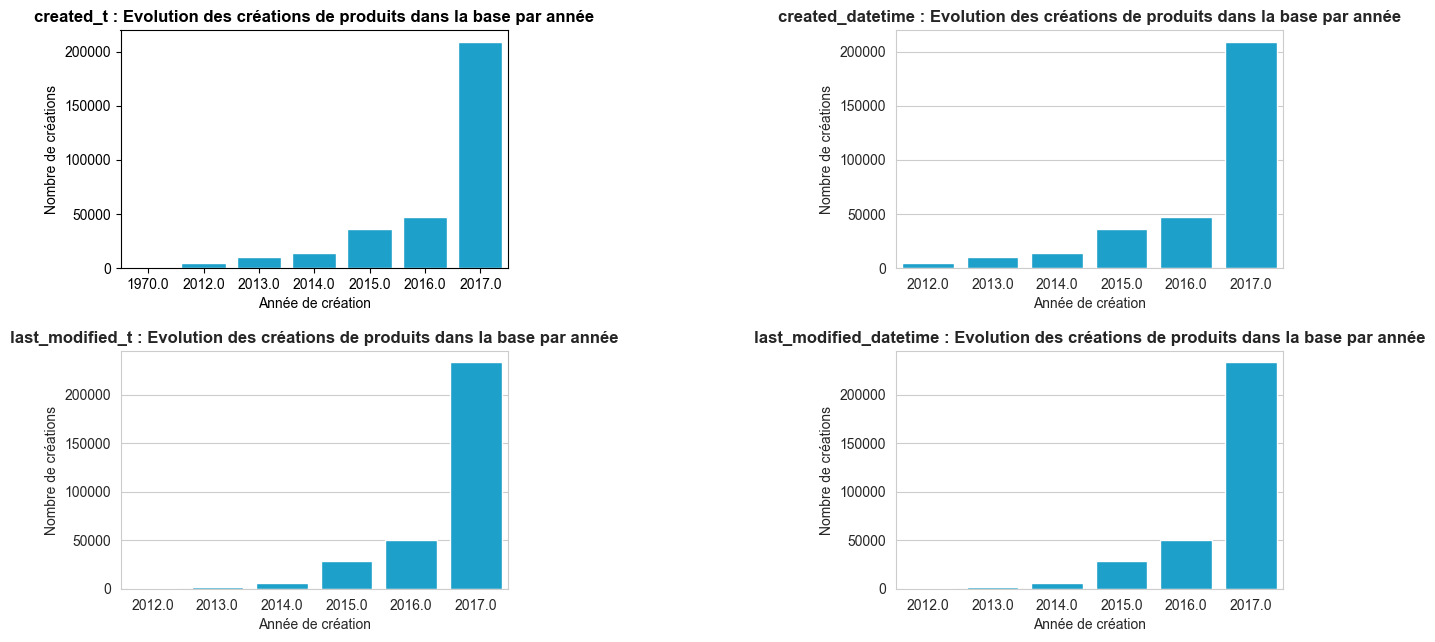

In [33]:
plt.figure(figsize=(15, 15), dpi=100)  # taille

plt.subplot(4, 2, 1)
add_per_year = df[['created_t', 'code']].groupby(by=df['created_t'].dt.year).nunique()
sns.set_style("whitegrid")
sns.barplot(data=add_per_year, x=add_per_year.index, y='code', color='#00afe6')
plt.title("created_t : Evolution des créations de produits dans la base par année",fontweight='bold')
plt.xlabel("Année de création")
plt.ylabel("Nombre de créations")

plt.subplot(4, 2, 2)
add_per_year = df[['created_datetime', 'code']].groupby(by=df['created_datetime'].dt.year).nunique()
sns.set_style("whitegrid")
sns.barplot(data=add_per_year, x=add_per_year.index, y='code', color='#00afe6')
plt.title("created_datetime : Evolution des créations de produits dans la base par année",fontweight='bold')
plt.xlabel("Année de création")
plt.ylabel("Nombre de créations")

plt.subplot(4, 2, 3)
add_per_year = df[['last_modified_t', 'code']].groupby(by=df['last_modified_t'].dt.year).nunique()
sns.set_style("whitegrid")
sns.barplot(data=add_per_year, x=add_per_year.index, y='code', color='#00afe6')
plt.title("last_modified_t : Evolution des créations de produits dans la base par année",fontweight='bold')
plt.xlabel("Année de création")
plt.ylabel("Nombre de créations")

plt.subplot(4, 2, 4)
add_per_year = df[['last_modified_datetime', 'code']].groupby(by=df['last_modified_datetime'].dt.year).nunique()
sns.set_style("whitegrid")
sns.barplot(data=add_per_year, x=add_per_year.index, y='code', color='#00afe6')
plt.title("last_modified_datetime : Evolution des créations de produits dans la base par année",fontweight='bold')
plt.xlabel("Année de création")
plt.ylabel("Nombre de créations")
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=1, hspace=0.35)
plt.show()

Quelle que soit les valeurs faisant référence aux dates : on observe un augmentation significative dans les années 2015-2017 
- created_t dispose d'information remontant à 1970 : il est possible que ce soit des erreurs de saisie nous pourrions les traiter quand nous verrons les outliers mais comme les nombres de variables sont similaire nous pensons garder les valeurs les plus à jours : **last_modified_datetime**
- Explication des dates : 
    - Le Nutri-Score est prévu dans la loi de 2016 en France
    - Mis en place en France en 2017, l'étiquetage nutritionnel Nutri-Score s'applique aujourd'hui dans sept pays

### 3.1.3 Les produits

In [34]:
# Les products name les plus présent
effectifs = df["product_name"].value_counts()
modalites = effectifs.index # contient les modalités
tab = pd.DataFrame(modalites, columns = ["Product_name"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab = tab.sort_values("n",ascending=False) # tri des valeurs de la variable X (croissant)


In [35]:
# On affiche les produits qui apparaissent le plus
tab.head(10)

,Product_name,n
0,Ice Cream,410
1,Extra Virgin Olive Oil,303
2,Potato Chips,281
3,Premium Ice Cream,226
4,Tomato Ketchup,182
5,Beef Jerky,167
6,Pinto Beans,162
7,Popcorn,157
8,Cookies,155
9,Salsa,150


In [36]:
tab.sample(10)

,Product_name,n
127759,"Juice, Acai Berry",1
51764,Crème aux œufs,1
208702,"Appel, Smoked Herring Fillets In Oil And Own J...",1
56295,Steamed Scottish Salmon Fillets,1
76451,6,1
93842,EL RON PROHIBIDO,1
124193,Pringles the original,1
130012,"Abe's, Muffins, Chocolate Chip Cookie",1
14150,"Thousand Island Dressing, Light",2
124924,"Original, Concentrated Curry Paste, Vindaloo, Hot",1


***
- **Variables exclues** : 
    - code : barcode of the product (can be EAN-13 or internal codes for some food stores)
    - url : url of the product page on Open Food Facts
    - creator : contributor who first added the product (redontante avec last_modified_t )
    - created_t : date that the product was added.sum() (UNIX timestamp format) (redontante avec last_modified_t )
    - created_datetime : date that the product was added (iso8601 format: yyyy-mm-ddThh:mn:ssZ) 
    - last_modified_datetime (redontante avec last_modified_t)
    - generic_name (84% de na)
    - quantity : quantity and unit : 13826 unités et quantités différentes
***
- **Variables conservées** :
    - **last_modified_t** : date that the product page was last modified (dernières valeurs)
    - **product_name** : name of the product
***

In [37]:
coll_gen = ['last_modified_t','product_name']

# 3.2 On explore les TAGS

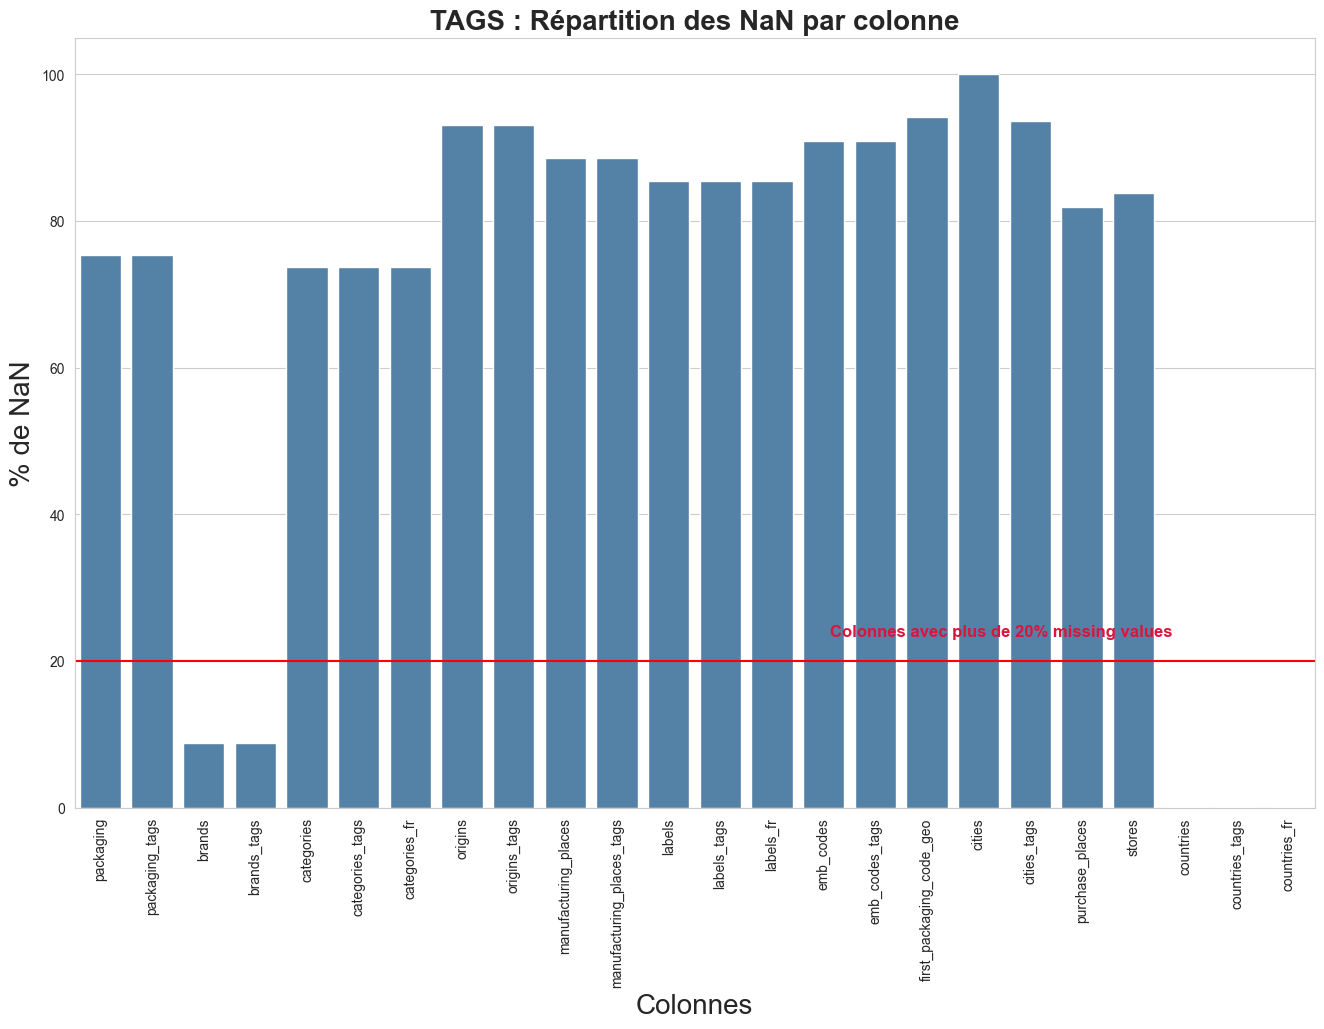

In [38]:
# On affiche les NaN des colonnes TAGS
tools.graph_NAN(data,20,10,34,"TAGS : Répartition des NaN par colonne")

In [39]:
liste_tags = df.iloc[:,10:34].columns
info_list_colonnes(df,liste_tags,True)

________
Colonne : packaging
Nombre de valeurs uniques : 14547
Type de la variable       : object
NaN                       : 75.38 %
Valeurs unique            : [nan 'plastique' 'Frais' ... 'Carton,Tetra Pak,brique'
 'Sachets,Emballage individuel' 'Tetra Pak,Brique,tetra pak']

________
Colonne : packaging_tags
Nombre de valeurs uniques : 12064
Type de la variable       : object
NaN                       : 75.38 %
Valeurs unique            : [nan 'plastique' 'frais' ... 'carton,tetra-pak,brique'
 'sachets,emballage-individuel' 'tetra-pak,brique,tetra-pak']

________
Colonne : brands
Nombre de valeurs uniques : 58784
Type de la variable       : object
NaN                       : 8.86 %
Valeurs unique            : ["Ferme t'y R'nao" nan 'Torn & Glasser' ... 'Roussette du Bugey'
 'Sans marque,D.Lambert' '乐吧']

________
Colonne : brands_tags
Nombre de valeurs uniques : 50253
Type de la variable       : object
NaN                       : 8.86 %
Valeurs unique            : ['ferme-t-y-r-nao

Nombre de valeurs uniques : 722
Type de la variable       : object
NaN                       : 0.09 %
Valeurs unique            : ['France' 'États-Unis' 'Royaume-Uni' 'France,États-Unis' 'Canada' 'Suisse'
 'Espagne' 'Allemagne' 'Slovénie' 'Italie' 'Roumanie' 'Australie'
 'Portugal' 'France,Royaume-Uni' 'Belgique,France,Pays-Bas,Royaume-Uni'
 'Guadeloupe' nan 'Royaume-Uni,États-Unis' 'Canada,États-Unis' 'Pays-Bas'
 'Australie,France' 'Canada,France,Suisse,États-Unis'
 'France,États-Unis,en:Etats-unis' 'Irlande' 'France,La Réunion' 'Taiwan'
 'Australie,Suisse' 'France,Allemagne' 'Brésil' 'Belgique,France'
 'République dominicaine' 'États-Unis,en:Australie' 'Arabie saoudite'
 'Émirats arabes unis' 'Irak' 'Koweït' 'Moldavie' 'Belgique'
 'Nouvelle-Calédonie' 'Singapour' 'Finlande' 'Australie,États-Unis'
 'France,Suisse'
 'Australie,Nouvelle-Zélande,Singapour,Thaïlande,États-Unis'
 'Polynésie française' 'Panama' 'Costa Rica' 'Mexique'
 'États-Unis,en:Pays-bas' 'Espagne,Royaume-Uni,en:Scotlan

### 3.2.1 Les categories

In [40]:
category_columns = ['categories','categories_tags','categories_fr']
df[df[category_columns].notnull().any(axis=1)][['product_name'] + category_columns].sample(5)

,product_name,categories,categories_tags,categories_fr
309727,Bebida de soja Sabor Vainilla,Leches de soja con vainilla,"en:plant-based-foods-and-beverages,en:beverage...","Aliments et boissons à base de végétaux,Boisso..."
182635,Bacon-Streifen,Bacon,"en:meats,en:pork,en:bacon","Viandes,Porc,Bacon"
104666,Vanilla Bean & Maple Syrup Smoothie,"yogurt drink,yogurt","en:dairies,en:yogurts,en:yogurt-drink","Produits laitiers,Yaourts,en:Yogurt-drink"
238447,Moutarde à l'Ancienne,"Epicerie,Condiments,Sauces,Moutardes,Moutardes...","en:groceries,en:condiments,en:sauces,en:mustar...","Epicerie,Condiments,Sauces,Moutardes,Moutardes..."
208381,Livarot de la Perelle AOP (22 % MG),"Frais,Produits laitiers,Produits labellisés,Fr...","en:fresh-foods,en:dairies,en:labeled-products,...","Frais,Produits laitiers,Produits labellisés,Fr..."


- **On ne simplifie pas les colonnes à une valeure car on perd des éléments de description du prduit important**

### 3.2.2 Produits et Marques

In [41]:
products_colums = ['product_name']
df[df[category_columns].notnull().any(axis=1)][['product_name']].sample(5)

,product_name
245393,Boisson au soja nature Bio
190425,30 Boulettes Kefta aux Épices Halal Surgelées
302684,Pure Fresh parfum Fresh Mint au Thé vert
301207,Nutella
285180,Klassiska salta jordnötter


In [42]:
df_gen_dup = df.loc[df[coll_gen].duplicated(keep=False),:]

In [43]:
df_gen_dup[["product_name","brands"]].head(6)
df_gen_dup.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_fr,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_fr,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_fr,ingredients_text,allergens,allergens_fr,traces,traces_tags,traces_fr,serving_size,additives_n,additives,additives_tags,additives_fr,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_fr,main_category,main_category_fr,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,omega-6-fat_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,oleic-acid_100g,gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
198,0000020043070,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-10 08:49:40,2017-03-10 08:49:40,2017-03-10 08:49:40,2017-03-10 08:49:40,Biscuit,NaN,NaN,NaN,NaN,Fresh & Easy,fresh-easy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Enriched wheat flour (niacin, reduced iron, th...",NaN,NaN,NaN,NaN,NaN,75 g (1 PIECE),3.0,[ enriched-wheat-flour -> en:enriched-wheat-f...,"en:e375,en:e101,en:e410","E375 - Acide nicotinique,E101 - Riboflavine,E4...",0.0,NaN,0.0,NaN,e,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",NaN,NaN,NaN,NaN,1452.0,NaN,20.00,10.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.053,33.33,2.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.3,8.00,NaN,NaN,NaN,1.42240,0.560,NaN,0.000200,NaN,NaN,NaN,NaN,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.400,NaN,0.00240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,19.0
199,0000020043087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,2017-03-10 08:49:40,2017-03-10 08:49:40,2017-03-10 08:49:40,2017-03-10 08:49:40,Biscuit,NaN,NaN,NaN,NaN,Fresh & Easy,fresh-easy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,États-Unis,"Enriched wheat flour (niacin, reduced iron, th...",NaN,NaN,NaN,NaN,NaN,75 g (1 PIECE),3.0,[ enriched-wheat-flour -> en:enriched-wheat-f...,"en:e375,en:e101,en:e410","E375 - Acide nicotinique,E101 - Riboflavine,E4...",0.0,NaN,0.0,NaN,d,NaN,NaN,"en:to-be-completed, en:nutrition-facts-

- **Suppression de lignes**

In [44]:
old_shape = df.shape[0]
# On supprime les doublons des produits de la même marque en conservant les valeurs nulles
df = df[(~df.duplicated(["product_name","brands"],keep="last")) | ((df['product_name'].isnull()) & (df['brands'].isnull()))]
print(f"On a supprimé : {old_shape - df.shape[0]} lignes en doublons")

On a supprimé : 21803 lignes en doublons


In [45]:
df.shape

(298969, 146)

### 3.2.3 Les Pays

In [46]:
countries_columns = ['countries','countries_tags','countries_fr']
df[df[category_columns].notnull().any(axis=1)][ countries_columns].sample(5)

,countries,countries_tags,countries_fr
252789,France,en:france,France
251566,France,en:france,France
310005,France,en:france,France
288636,"Suisse, en:france","en:france,en:switzerland","France,Suisse"
221801,France,en:france,France


#### le nombre de pays représentés 

In [47]:
print(f"countries : nombre de pays : {df['countries'].nunique()}")
print(f"countries_tags : nombre de pays : {df['countries_tags'].nunique()}")
print(f"countries_fr : nombre de pays : {df['countries_fr'].nunique()}")

countries : nombre de pays : 1359
countries_tags : nombre de pays : 687
countries_fr : nombre de pays : 683


In [48]:
countries_fr = df.groupby(by="countries_fr").nunique()
countries_fr[['code']].head()

,code
countries_fr,
Afrique du Sud,35
Albanie,7
"Albanie,Danemark,Italie",1
"Albanie,Italie",4
Algérie,134


In [49]:
countries = df.groupby(by="countries").nunique()
countries[['code']].head()

,code
countries,
ALLEMAGNE,1
Albania,2
"Albania,Italia",1
"Albania,Italia, en:denmark",1
"Albania,Italy",3


- **On choisit countries_fr pour ses valeurs en Français**

In [71]:
# tableau des effectifs
def tab_effectifs(df,col):
    effectifs = df[col].value_counts()
    modalites = effectifs.index # contient les modalités
    tab = pd.DataFrame(modalites, columns = [col]) # création du tableau à partir des modalités
    tab["n"] = effectifs.values
    tab = tab.sort_values("n",ascending=False) # tri des valeurs de la variable X (croissant)
    return tab

In [72]:
tab_effectifs(df,'countries_fr')

,countries_fr,n
0,États-Unis,157537
1,France,90328
2,Suisse,14641
3,Allemagne,7451
4,Espagne,4741
5,Royaume-Uni,4472
6,Belgique,2513
7,Australie,2004
8,Russie,1302
9,Italie,1200


In [95]:
# On traite les dates et on visualise
df1 = df.copy()

In [96]:
df1['countries_fr'] = df1['countries_fr'].str.split(',', n=1, expand=True)[0]

In [97]:
tab_effectifs(df1,'countries_fr')

,countries_fr,n
0,États-Unis,157552
1,France,93090
2,Suisse,14729
3,Allemagne,7732
4,Espagne,4770
5,Royaume-Uni,4508
6,Belgique,3269
7,Australie,2088
8,Russie,1306
9,Italie,1226


- On charger la listes des pays officiel pour supprimer les pays non conforme à la liste des pays du ministère des affaire étrangères francais

In [92]:
df_countries = pd.read_csv("assets/datas/liste-197-etats-2020.csv",sep=";")
df_countries.head()

,NOM,NOM_ALPHA,CODE,ARTICLE,NOM_LONG,CAPITALE
0,Afghanistan,Afghanistan,AFG,l',République islamique d'Afghanistan,Kaboul
1,Afrique du Sud,Afrique du Sud,ZAF,l',République d'Afrique du Sud,Prétoria
2,Albanie,Albanie,ALB,l',République d'Albanie,Tirana
3,Algérie,Algérie,DZA,l',République algérienne démocratique et populaire,Alger
4,Allemagne,Allemagne,DEU,l',République fédérale d'Allemagne,Berlin


In [100]:
# On définit les pays valides
VALID_COUNTRIES = df_countries['NOM'].unique()
# On applique un mask pour écarter les pays qui ne sont pas valides
mask = ~df1['countries_fr'].isin(VALID_COUNTRIES)
df1.loc[mask, 'countries_fr'] = np.NaN

In [101]:
# On affiche les pays
tab_effectifs(df1,'countries_fr')

,countries_fr,n
0,États-Unis,157552
1,France,93090
2,Suisse,14729
3,Allemagne,7732
4,Espagne,4770
5,Royaume-Uni,4508
6,Belgique,3269
7,Australie,2088
8,Russie,1306
9,Italie,1226


#### Bilan

***
- **Variables écartées en raison du nombre de valeurs manquantes ou inutile pour notre application** 
    - packaging : shape, material : matériaux utilisé pour l'emballage 
    - packaging_tags              : derscription de l'emballage
    - brands_tags                 : précision sur la marque
    - categories_tags             : précision sur les catégories en anglais
    - categories_fr               : catégorie des produits  : variable redondante avec categories
    - origins                     : origins of ingredients
    - origins_tags                : précision sur les origines des produits
    - manufacturing_places        : places where manufactured or transformed
    - manufacturing_places_tags   : précision sur les lieu de fabrication des produits
    - labels_tags                 : précision sur les labels
    - labels_fr                   : variable redondante avec labels
    - emb_codes                   : code lieu de fabrication
    - emb_codes_tags              : emb_codes en Majuscule 
    - first_packaging_code_geo    : coordonnées du premier lieu d'emballage 
    - cities                      : inutile 4 valeurs b,c,a 
    - cities_tags                 : ville
    - purchase_places             : Lieu de vente
    - stores                      : enseigne qui vend le produit                   
    - countries_tags              : précision sur les countries
    - countries_fr                : redoudant avec countries
    - categories                  : catégorie de produit
***
- **Variables conservées**
    - **countries** : list de pays ou le produit est vendu
    - **brands**    : marque du produit (meilleure syntaxe)
    - **labels**    :  peu nous donner des information important concernant l'idée d'app
***

In [ ]:
# On identifie la variable qui représente le mieux les catégories
df[['categories','main_category','categories_fr','main_category_fr','pnns_groups_1','pnns_groups_2']].sample(25)

In [ ]:
col_tags = ['countries','brands','main_category_fr','labels']

# On explore les INGREDIENTS

In [ ]:
tools.graph_NAN(data,32,34,63,"INGREDIENTS : Répartition des NaN par colonne")

In [ ]:
liste_ingredients = df.iloc[:,34:59].columns
info_list_colonnes(df,liste_ingredients,True)

***
- **Variables écartées en raison du nombre de valeurs manquantes ou inutiles pour notre application**  
    
    - allergens                                    : trace de produits qui peuvent être présents 
    - allergens_fr                                 : lien vers une image
    - traces                                       : trace de produits qui peuvent être présents 
    - traces_tags                                  : trace de produits qui peuvent être présents avec mention en:
    - traces_fr                                    : trace de produits qui peuvent être présents en français
    - serving_size                                 : recommandation US de la quantité de produit a consommer
    - additives_n                                  : nombre d'additif pour preserver couleurs, conservateurs, goûts...
    - additives_tags                               : numéro de l'additif
    - additives_fr                                 : Nom et numéro de l'additif en français
    - ingredients_from_palm_oil_n                  : nombre d'ingrédient venant d'huile de palm
    - ingredients_from_palm_oil_tags               : type de transformation ou d'élément provenant d'huile de palme 
    - ingredients_that_may_be_from_palm_oil_n      : nombre d'élément privenant de l'huile de palme
    - ingredients_that_may_be_from_palm_oil_tags   : type de transformation ou d'élément provenant d'huile de palme
    - states                                       : etat de l'avancé de la base de données et de ses valeurs
    - states_tags                                  : quasi copy de states
    - states_fr                                    : states en français
    - main_category                                : catégories de produits
    - main_category_fr                             : catégories de produits en français
    - image_url                                    : url => image du produit grand format 400
    - image_small_url                              : url => image du produit de petit format 200
***
- **Variables conservées**
    - **ingredients_text**                             : Composition produit
    - **additives**                                    : nom des additifs natutels ou chimiques
    - **nutrition_grade_fr**                           : Score fr compris entre ('nan 'd' 'b' 'c' 'a' 'e')
    - **pnns_groups_1**                                : groupe de classement (pourra permettre de rechercher les produits).
    - **pnns_groups_2**                                : sous-groupe de classement du produit 
    

In [ ]:
col_ingredients = ['ingredients_text','additives','nutrition_grade_fr','pnns_groups_1','pnns_groups_2']

# On explore les NUTRITION FACTS

In [ ]:
tools.graph_NAN(data,False,63,165,"NUTRITION FACTS : Répartition des NaN par colonne ayant suffixe _100g")

In [ ]:
liste_nutrition_facts = df.iloc[:,59:135].columns
liste_nutrition_facts

**PREMIERE SELECTION**
***
- **INFORMATION GENERAL** 
    - Variable conservées
        - countries : list de pays ou le produit est vendu
        - Brands : marque du produit
        - categories
        - labels : peu nous donner des information important concernant l'idée d'app
***
- **TAGS**   
    - Variable conservées
        - last_modified_t : date that the product page was last modified (dernières valeurs)
        - product_name : name of the product
***
- **INGREDIENTS**
    - Variable conservées
        - ingredients_text                             : Composition produit
        - additives                                    : nom des additifs natutels ou chimiques
        - nutrition_grade_fr                           : Score fr compris entre ('nan 'd' 'b' 'c' 'a' 'e')
        - pnns_groups_1                                : groupe de classement (pourra permettre de rechercher les produits).
        - pnns_groups_2                                : sous-groupe de classement du produit 
***


#### Idée d'application 
***
- **L'idée de l'application** : Aider les personnes en situation d'insuffisance rénale à être informer sur les produits à surveiller.

    - Calcium_100g
    - sodium_100g
    - salt_100g
    - proteins_100g
    - iron_100g
    - potassium_100g
    - nutrition-score-fr_100g

## 3.1 Selection des colonnes information non numériques utiles pour notre application

In [ ]:
# Le code ne peut etre utilisé comme index car non unique
doublon_code = df[df.duplicated(['code'],keep=False)]
doublon_code.shape

https://www.kaggle.com/code/michaelfumery/openfoodfacts-data-cleaning

- Les types semblent cohérent avec ce qu'ils représentent

In [ ]:
tools.get_description_variables(df,type_var='categ')

In [ ]:
tools.get_description_variables(df,type_var='num')

<a href='#sommaire'>
    <img src="assets/img/menu.jpg" />
</a>

https://www.kaggle.com/code/ymmn233413/youssef-moumna-p3-02-notebook-v0-ipynb

<a href='#sommaire'>
    <img src="assets/img/menu.jpg" />
</a>